In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("archive/guardian_headlines.csv")

In [3]:
df.head(10)

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...
5,18-Jul-20,English councils call for smoking ban outside ...
6,18-Jul-20,Can Tesla justify a $300bn valuation?
7,18-Jul-20,Empty city centres: 'I’m not sure it will ever...
8,18-Jul-20,Democratising finance for all? An investment a...
9,18-Jul-20,"Homebuyer loses £300,000 to fraudsters – but g..."


In [4]:
first_row = df.head(1)

last_row = df. tail(1)

print(first_row)

print (last_row)

        Time                                         Headlines
0  18-Jul-20  Johnson is asking Santa for a Christmas recovery
            Time                                          Headlines
17799  17-Dec-17  The Guardian view on Ryanair’s model: a union-...


In [5]:
review_df = df[['Headlines']]

print(review_df.shape)
review_df.head(5)

(17800, 1)


,Headlines
0,Johnson is asking Santa for a Christmas recovery
1,‘I now fear the worst’: four grim tales of wor...
2,Five key areas Sunak must tackle to serve up e...
3,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [6]:
# Convert 'Time' column to datetime with the correct format string for "18-Jul-20"
df['Time'] = pd.to_datetime(df['Time'], format='%d-%b-%y', errors='coerce')

# Filter out any invalid dates (NaT)
df_filtered = df.dropna(subset=['Time'])

# Filter data within the specified time frame
start_date = pd.to_datetime('2017-12-01')
end_date = pd.to_datetime('2020-07-31')
df_filtered = df[(df['Time'] >= start_date) & (df['Time'] <= end_date)]

In [7]:
# Perform sentiment analysis on headlines
from textblob import TextBlob

def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

df_filtered['Sentiment'] = df_filtered['Headlines'].apply(analyze_sentiment)


/var/folders/ms/f642sm1j05dg1xy8j5xk2p580000gn/T/ipykernel_79807/3979259707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Sentiment'] = df_filtered['Headlines'].apply(analyze_sentiment)


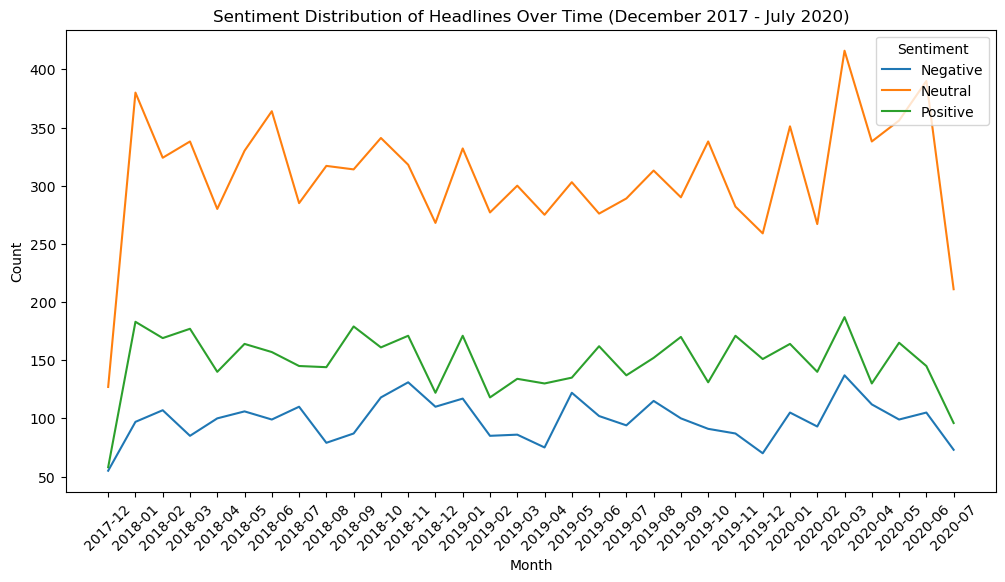

In [8]:
# Group by month and calculate sentiment distribution
df_sentiment_by_month = df_filtered.groupby(df_filtered['Time'].dt.to_period('M'))['Sentiment'].value_counts().unstack().fillna(0)

# Create line plot for sentiment distribution
plt.figure(figsize=(12, 6))
for sentiment in df_sentiment_by_month.columns:
    plt.plot(df_sentiment_by_month.index.astype(str), df_sentiment_by_month[sentiment], label=sentiment)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Sentiment Distribution of Headlines Over Time (December 2017 - July 2020)')
plt.legend(title='Sentiment', loc='upper right')
plt.xticks(rotation=45)
plt.show()